In [ ]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def datos(year,month,day,hour):
    
    day_str = f'{day:02}'
    month_str = f'{month:02}'
    hour_str = f'{hour:02}'

    data_dir  = '/eos/user/d/dcazarra/datos_panchito/'

    
    filename = f't600_nogps_{year}_{month_str}_{day_str}_{hour_str}h00.dat'

    
    ch1,ch2 = np.loadtxt(os.path.join(data_dir, filename), unpack=1, dtype=int)
    
    print(filename)
    
    return ch1,ch2

In [10]:
# ch1 manda un solo arreglo con dimensiones 1 fila x num total de ADC 
ch1, ch2 = np.array(datos(2024,5,1,13))

t600_nogps_2024_05_01_13h00.dat


In [11]:
# Agrupa por pulsos, cada la representa un pulso.
ch1_grupo = ch1.reshape(len(ch1)//32, 32)

In [12]:
len(ch1_grupo[0,:])

32

In [13]:
indices_trigger = []
for i in range(0,len(ch1_grupo[0:10,0])):
    for indice, bins in enumerate(ch1_grupo[i,:]):
        if bins>=600:
            indices_trigger.append(indice)
            break      

In [14]:
suma = np.sum(ch1_grupo, axis=1)

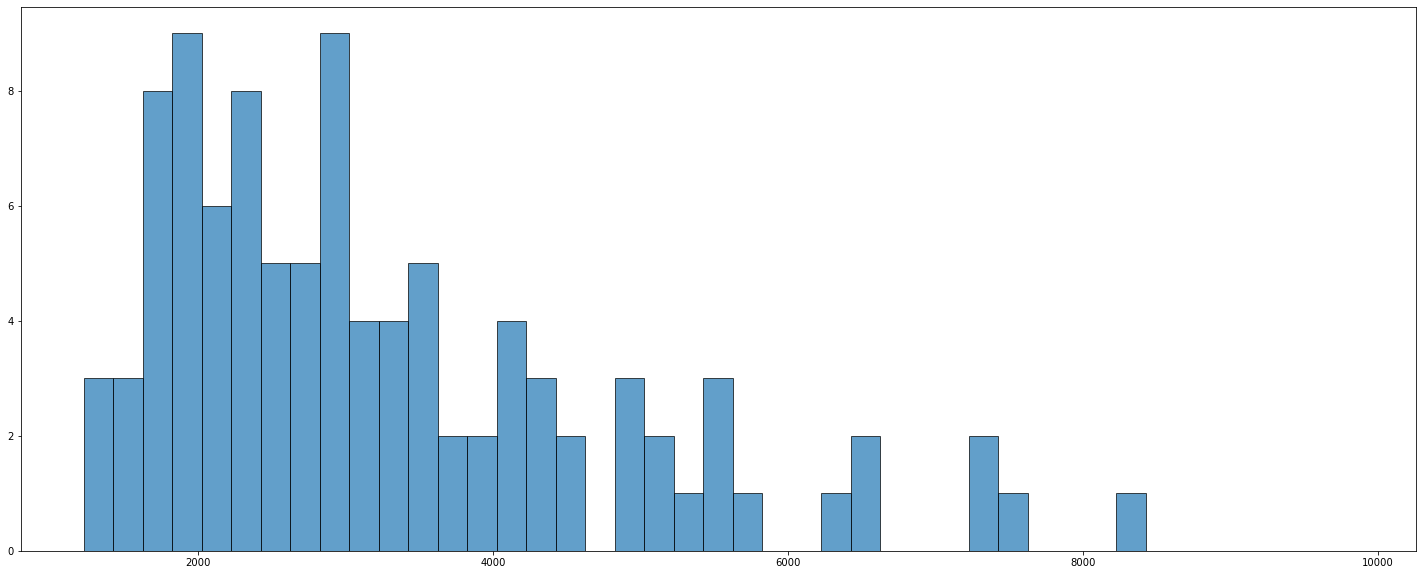

In [33]:
counts,bin_edges=np.histogram(suma[0:100], bins=np.arange(min(suma[0:100]),max(suma[0:100]) + 1,200))
plt.figure(figsize=(25,10))
#plt.semilogy(bin_edges[:-1],counts, lw=2, label=f'CH')
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', alpha=0.7, label='Histograma Carga') 
plt.show()

In [21]:
suma_acotada = suma[suma>=40000]

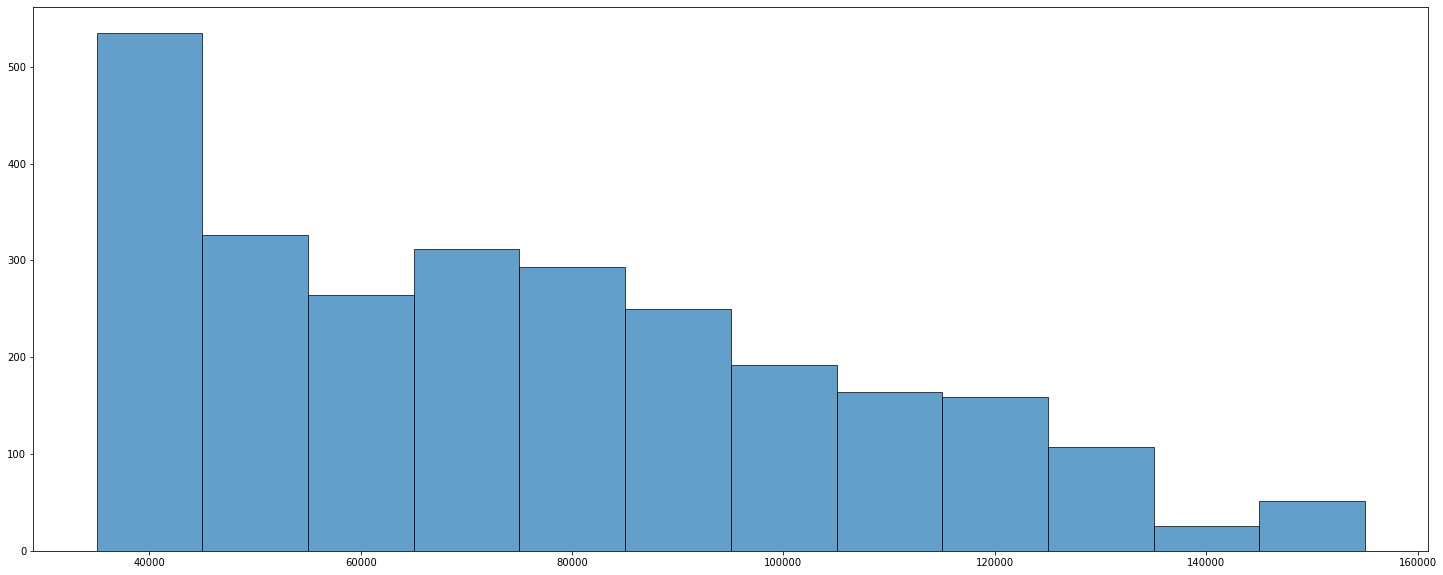

In [25]:
counts,bin_edges=np.histogram(suma_acotada, bins=np.arange(min(suma_acotada),max(suma_acotada) + 1,10000))
plt.figure(figsize=(25,10))
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', alpha=0.7, label='Histograma Carga') 
plt.show()